# DSCI 512 Lab 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from collections import defaultdict, Counter
%config InlineBackend.figure_formats = ['svg']

## Submission instructions
rubric={mechanics:10}

- Follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- Make at least three commits in your lab's GitHub repository.
- Push the final `.ipynb` file and the rendered `pdf` file to your GitHub repository for this lab.
- Before submitting your lab, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
- Make sure that your plots/output are rendered properly in Gradescope.
- Upload a ZIP file to Gradescope containing **only** the following two files:
    1. Your completed and executed `.ipynb` file
    2. A PDF-exported version of the `.ipynb` file
- Include a clickable link to your GitHub repo for the lab just below this cell.

_YOUR REPO LINK GOES HERE_

## Exercise 1: time complexity

For each of the following functions, determine the time complexity as a function of the input $n$ using big-O notation and briefly justify your answer. Assume $n$ is a positive integer. If you get stuck, it's fair game to test things empirically and then try to understand what you observe. **Please state your assumptions if you don’t know how long some operation in Python takes.** 

The first question is done for you, as an example.

In [4]:
def example(n):
    for i in range(n):
        print(i)
        print(i**2)
        x = 9
        y = 10

example(5)

**Sample answer**: The time complexity of `example` is  $O(n)$ because the function loops over $n$ elements and only performs constant-time operations inside the loop. 

#### 1(a)
rubric={reasoning:2}

In [5]:
def loopy(n):
    for i in range(n):
        for j in range(n):
            print('i =', i, '  j =', j)

In [6]:
loopy(4)

i = 0   j = 0
i = 0   j = 1
i = 0   j = 2
i = 0   j = 3
i = 1   j = 0
i = 1   j = 1
i = 1   j = 2
i = 1   j = 3
i = 2   j = 0
i = 2   j = 1
i = 2   j = 2
i = 2   j = 3
i = 3   j = 0
i = 3   j = 1
i = 3   j = 2
i = 3   j = 3


The time complexity of `loopy` is  $O(n^2)$ because of it is a loop within a loop, each loop with n iterations.

#### 1(b)
rubric={reasoning:2}

In [7]:
def triangle(n):
    for i in range(n):
        for j in range(i):
            print("+", end='')
        print("")

In [8]:
triangle(7)


+
++
+++
++++
+++++
++++++


Outer loop has n iterations. Inner loop has 1,2,...(n-1) iterations. Critical section (code within inner loop) is constant time.
We can count the total number of critical section iterations ('+'s printed) with $\sum_{i=1}^{n-1}i=\frac{n(n-1)}{2} \in O(n^2)$.

Therefore the time complexity of `broken` is $O(n^2)$.

#### 1(c)
rubric={reasoning:2}

In [9]:
def foo(n):
    x = np.zeros(n)
    x = x + 1000
    return x

In [10]:
print('size of x: ', len(foo(100000)))

size of x:  100000


The time complexity of `foo` is  $O(n)$ because 1000 is added to each element of x, which is of size $n$. 

#### 1(d)
rubric={reasoning:3}

In [11]:
def bar(n):
    x = np.zeros(1000)
    x = x + n
    return x

In [12]:
print('size of x: ', len(bar(100000)))

size of x:  1000


The time complexity of `bar` is  $O(1)$ because the size of `x` is constant. We are adding $n$ to each element of `x`, but since `x` has a constant size (1000), the running time is independent of $n$, and therefore $O(1)$.

In other words, the number of additions is constant (1000) and whether you're adding a small number or a large number doesn't affect the running time.

#### 1(e)
rubric={reasoning:3}

In [13]:
def broken(n):
    for i in range(n**2):
        if i == n:
            break  # "break" exits the innermost loop
        print(i)

In [14]:
broken(4)

0
1
2
3


The time complexity of `broken` is $O(n)$ because the loop iterates $n$ times; it is broken when $i$ equals $n$. 

#### 1(f)
rubric={reasoning:3}

In [15]:
def cabin(n):
    i = n
    while i > 1:
        print('i = ', i)
        i = i // 2

Note: the `//` operator performs integer division, meaning the result is rounded *down* to the nearest integer.

In [16]:
cabin(2048)

i =  2048
i =  1024
i =  512
i =  256
i =  128
i =  64
i =  32
i =  16
i =  8
i =  4
i =  2


The time complexity of `cabin` is $O(\log n)$. At each iteration `i` is divided by 2, so the number is steps is the number of times you need to divide a number by 2 to get to 1, which is roughly $\log_2 n$. The base of the log doesn't matter in big O, so we write $O(\log n)$.

#### 1(g)
rubric={reasoning:3}

In [17]:
def cabin10(n):
    i = n
    while i > 1:
        print('i = ', i)
        i = i // 10

In [18]:
cabin10(2048)

i =  2048
i =  204
i =  20
i =  2


The time complexity of `cabin10` is also $O(\log n)$.

Note that $O(\log n)$ is the same thing as $O(\log_2 n)$ or $O(\log_{10} n)$ because they only differ by a constant factor.

#### 1(h)
rubric={reasoning:3}

For this question, answer in terms of both $m$ and $n$.

In [19]:
def blahblah(n, m):
    x = 0

    for i in range(n):
        for j in range(m):
            x = x + 1

    for i in range(n):
        x = x + 1

    for i in range(m):
        x = x + 1
        
    return x

In [20]:
blahblah(2,3)

11

The time complexity is $O(nm)$ because we have an $nm$ loop, an $n$ loop and an $m$ loop, and the latter two are smaller + can be neglegected.

#### 1(i)
rubric={reasoning:3}

For this question, answer in terms of both $m$ and $n$.

In [21]:
def bllllergh(n, m):
    x = 0
    for i in range(n):
        for j in range(m):
            for k in range(m):
                x = x + 1
    for i in range(n):
        for j in range(n):
            for k in range(m):
                x = x + 1
    return x

In [22]:
bllllergh(2,3)

30

$O(nm^2 + n^2m)$. Neither term can be removed because we can't know which one will be bigger without knowing $n$ and $m$.

#### 1(j)
rubric={reasoning:3}

In [23]:
def log_cabin(n):
    for i in range(n):
        print('i = ', i)
        for j in range(n//3):
            print('j = ', j)
            cabin(n)
        print('-----------')

In [24]:
log_cabin(4)

i =  0
j =  0
i =  4
i =  2
-----------
i =  1
j =  0
i =  4
i =  2
-----------
i =  2
j =  0
i =  4
i =  2
-----------
i =  3
j =  0
i =  4
i =  2
-----------


The time complexity of `log_cabin` is  $O(n^2 \log n)$. The outer loop runs $n$ times, the inner loops runs $n/3$ times, and the body of the inner loop is $O(\log n)$ time. Multiplying these together and discarding the constant factor of $1/3$ gives us the answer.

## Exercise 2: time complexity of recursive functions

For each of the following recursive functions, determine the time complexity as a function of the input $n$ and briefly justify your answer. Assume $n$ is a positive integer.

#### 2(a)
rubric={reasoning:3}

In [25]:
def titled(n):
    if n >= 0:
        print('n: ', n)
        return titled(n-1)
    else:
        return "sandwich"

In [26]:
titled(15)

n:  15
n:  14
n:  13
n:  12
n:  11
n:  10
n:  9
n:  8
n:  7
n:  6
n:  5
n:  4
n:  3
n:  2
n:  1
n:  0


'sandwich'

The time complexity of `titled` is  $O(n)$ because there are $n-1$ recursive calls to the function.

#### 2(b)
rubric={reasoning:3}

In [27]:
def untitled(n):
    if n < 0:
        return "sandwich"
    else:
        print('n: ', n)
        return untitled(n-2)

In [28]:
untitled(8)

n:  8
n:  6
n:  4
n:  2
n:  0


'sandwich'

The time complexity of `untitled` is  $O(n)$ because there are $n/2$ recursive calls to the function and $O(n/2)$ comes down to $O(n)$, as constants are ignored in big-O. 

### 2(c)
rubric={reasoning:3}

In [29]:
def does_nothing(n):
    print('n:', n)
    if n == 0:
        return
    does_nothing(n-1)
    does_nothing(n-1)

In [30]:
does_nothing(3)

n: 3
n: 2
n: 1
n: 0
n: 0
n: 1
n: 0
n: 0
n: 2
n: 1
n: 0
n: 0
n: 1
n: 0
n: 0


The time complexity of `does_nothing` is $O(2^n)$ because each call of the function has two recursive calls. If you draw the calls in a tree fashion, the depth of the tree (the number of levels) is $n$, and at each level we see a branching factor of two.

So there will be total $2^0 + 2^1 + 2^2 + \ldots + 2^{n-1} + 2^n = 2^{n+1} - 1$ function calls. In big O, this is equivalent to $O(2^n)$.

#### 2(d)
rubric={reasoning:3}

In [31]:
def does_nothing_more_slowly(n):
    print(n)
    if n == 0:
        return
    does_nothing_more_slowly(n-1)
    does_nothing_more_slowly(n-1)
    does_nothing_more_slowly(n-1)

In [32]:
does_nothing_more_slowly(3)

3
2
1
0
0
0
1
0
0
0
1
0
0
0
2
1
0
0
0
1
0
0
0
1
0
0
0
2
1
0
0
0
1
0
0
0
1
0
0
0


The time complexity of `does_nothing_more_slowly` is $O(3^n)$ because each call of the function has three recursive calls. If you draw the calls in a tree fashion, the depth of the tree (the number of levels) is $n$, and at each level we see a branching factor of three.

So there will be total $3^0 + 3^1 + 3^2 + \ldots + 3^{n}$ function calls. In big O, this is equivalent to $O(3^n)$.

#### 2(e)
rubric={reasoning:3}

In [33]:
def recursive_cabin(n):
    if n == 0:
        return
    print("n = %d" % n)
    recursive_cabin(n//2)
    

In [34]:
recursive_cabin(100)

n = 100
n = 50
n = 25
n = 12
n = 6
n = 3
n = 1


At each call, n is halved, resulting in a total of $O(log(n))$ calls to `recursive_cabin`. Within each call, we perform only constant-time operations. Therefore, the total time complexity is $O(log(n))$.

#### 2(f)
rubric={reasoning:3}

In [35]:
def does_nothing_more_quickly(n):
    print(n)
    if n == 0:
        return
    for i in range(n):
        does_nothing_more_quickly(0)

In [36]:
does_nothing_more_quickly(10)

10
0
0
0
0
0
0
0
0
0
0


The loop has $n$ iterations. In each iteration of the loop, we make a recursive call to `does_nothing_more_quickly`, however, since we only recursively call with `n=0`, we always hit the base case and immediately return. In other words, all recursive calls are constant-time. Therefore we have time complexity of $O(n)$.

#### (challenging) 2(g)
rubric={reasoning:1}

In [37]:
def looprec(n):
    print("Hello!")
    print('N: ', n)
    for i in range(n):
        looprec(n-1)

In [38]:
looprec(3)

Hello!
N:  3
Hello!
N:  2
Hello!
N:  1
Hello!
N:  0
Hello!
N:  1
Hello!
N:  0
Hello!
N:  2
Hello!
N:  1
Hello!
N:  0
Hello!
N:  1
Hello!
N:  0
Hello!
N:  2
Hello!
N:  1
Hello!
N:  0
Hello!
N:  1
Hello!
N:  0


The tree generated by this recursive function has $n!$ leaves, because the root branches $n$ times, then $n-1$ times, then $n-2$ times, etc. However, the running time is technically the total number of nodes, not the number of leaves in the tree. Usually these are the same in terms of big-O, but here it's not quite. The total number of nodes is $\sum_{i=1}^n \frac{n!}{i!}$. Since big-O is just an upper bound, we can upper-bound each term in the sum by $n!$ and thus the whole sum by $n\times n!$ or $(n+1)!$. This would be a fine answer, as would be $O(n^{n+1})$, which is an even looser bound. In reality, the running time is so huge that anything this slow would be impractical, so finding a very tight bound isn't that critical here.

## Exercise 3: space complexity

For each of the following functions, determine the space complexity as a function of the input $n$ using big-O notation and briefly justify your answer. 

#### 3(a)
rubric={reasoning:3}

In [39]:
def foo(n):
    x = np.random.rand(n)
    y = np.random.rand(n)
    total = 0
    for x_i in x:
        for y_i in y:
            total += x_i*y_i
    return total

The space complexity of `foo` is $O(n)$ because we are storing $x$ and $y$, each of which has $n$ elements.

#### 3(b)
rubric={reasoning:3}

In [40]:
def bar(n):
    x = np.zeros(1000)
    x = x + n
    return x

The space complexity of `bar` is $O(1)$ because $x$ has only 1000 elements, which is a constant. 

#### 3(c)
rubric={reasoning:3}

In [41]:
def FUNCTION(n):
    x = set()
    for i in range(n):
        for j in range(n):
            x.add(j)
    return x

The space complexity of `FUNCTION` is $O(n)$ because `x` is a set, which cannot contain duplicates. While the time complexity is $O(n^2)$, the set only grows to contain the integers from $0$ to $n-1$.

#### 3(d)
rubric={reasoning:3}

In [42]:
def hello(n):
    x = list()
    for i in range(n):
        y = [j for j in range(1000)]
        x.append(y)
    return x

The space complexity of `hello` is $O(n)$ because we store `1000n` elements, each constant-size, to `x` (1000 elements for each loop). We can discard the constant factor, yielding $O(n)$.

#### (challenging) 3(f)
rubric={reasoning:1}

In this exercise, determine the **space** complexity of `hello` in terms of $n$.

In [43]:
def hello(n):
    if n == 0:
        return 1
    return hello(n-1) + hello(n-1)

In [44]:
hello(4)

16

$O(n)$. 

While the time complexity of `hello` is $O(2^n)$, the space complexity is only $O(n)$. The function call stack stores functions within functions within functions. E.g. `hello(10)` calls `hello(9)` calls `hello(8)` calls `hello(7)`, etc. The depth of the recursion is $n$, so we never have a stack of function calls more than $n$ deep. What this means practically  is that the function at the top of the stack finishes before the next function is called, so the stack isn't actually growing once it reaches $n$ function calls, because functions are completing every time they are being called. 

## Exercise 4: Timing for hashing

#### 4(a)
rubric={reasoning:5}

We observed in class that Python's `dict` data structure grows in size when it becomes too full. In this question, we will investigate exactly when this growth occurs.

- First, create a plot showing the memory size of a dictionary using [`sys.getsizeof`](https://docs.python.org/3/library/sys.html#sys.getsizeof) as a function of the number of elements it contains. Consider dictionary sizes ranging from 1 to 1,000,000 elements.
- Using the data you generate, identify the points where the dictionary size increases. Discuss your result.

In [64]:
## IGNORE ##
import sys

d = dict()
l = list()
nmax = 1_000_000
d_sizes = np.zeros(nmax)
l_sizes = np.zeros(nmax)
for i in range(nmax):
    key = np.random.randint(0, 1e15)
    d[key] = "blah"
    d_sizes[i] = sys.getsizeof(d)
    l.append("blah")
    l_sizes[i] = sys.getsizeof(l)


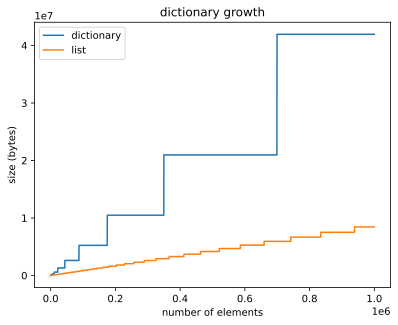

In [46]:
## IGNORE ##
plt.plot(d_sizes, label='dictionary')
plt.plot(l_sizes, label='list')
plt.xlabel('number of elements')
plt.ylabel('size (bytes)')
plt.title('dictionary growth')
plt.legend();

And a log-log version:

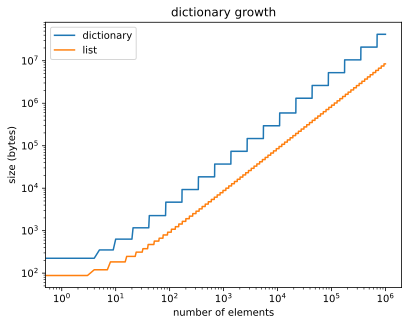

In [47]:
## IGNORE ##
plt.loglog(d_sizes, label='dictionary')
plt.loglog(l_sizes, label='list')
plt.xlabel('number of elements')
plt.ylabel('size (bytes)')
plt.title('dictionary growth')
plt.legend()

Here are the sizes where the hash table grew:

In [48]:
## IGNORE ##
np.where(np.diff(d_sizes) != 0)

(array([     4,      9,     20,     41,     84,    169,    340,    681,
          1364,   2729,   5460,  10921,  21844,  43689,  87380, 174761,
        349524, 699049]),)

These are roughly powers of 2:

In [49]:
## IGNORE ##
np.log2(np.where(np.diff(d_sizes) != 0))

array([[ 2.        ,  3.169925  ,  4.32192809,  5.357552  ,  6.39231742,
         7.40087944,  8.40939094,  9.41151099, 10.41362793, 11.41415668,
        12.41468524, 13.41481734, 14.41494944, 15.41498246, 16.41501549,
        17.41502374, 18.415032  , 19.41503406]])

#### (challenging) 4(b)
rubric={reasoning:1}

Repeat the experiment, but this time with a Python `list`, instead of a `dict`. Plot the memory size of a list (using `sys.getsizeof`) versus the number of elements, ranging from 1 to 1,000,000. Then compare the growth behavior of the list to that of the dict and discuss your findings.


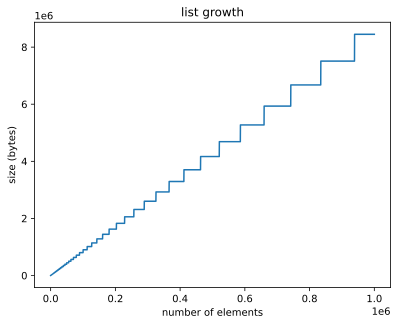

In [50]:
## IGNORE ##
plt.plot(l_sizes)
plt.xlabel('number of elements');
plt.ylabel('size (bytes)');
plt.title('list growth');

The dictionary appears to double from time to time, the list grows more frequently and grows by a smaller amount; it seems to grow by a small percentage of the size:

In [51]:
## IGNORE ##
z = np.diff(l_sizes) / l_sizes[1:]
z[z > 0]

array([0.26666667, 0.34782609, 0.25806452, 0.20512821, 0.17021277,
       0.20338983, 0.16901408, 0.14457831, 0.16161616, 0.13913043,
       0.14814815, 0.12903226, 0.13407821, 0.1352657 , 0.13389121,
       0.13090909, 0.12698413, 0.12256267, 0.11793612, 0.12095032,
       0.12144213, 0.12020033, 0.11782032, 0.11473272, 0.11534025,
       0.11440245, 0.11562782, 0.11510791, 0.11339476, 0.11313639,
       0.11364903, 0.11270391, 0.11232997, 0.11219322, 0.11207195,
       0.11182796, 0.11235342, 0.11232147, 0.11180391, 0.11155683,
       0.11195929, 0.11152977, 0.1114236 , 0.11138879, 0.11163971,
       0.11158073, 0.11149128, 0.11151479, 0.11146979, 0.11124773,
       0.11134815, 0.1113423 , 0.11128005, 0.11130994, 0.11125897,
       0.1112297 , 0.11117094, 0.11120479, 0.11115837, 0.11118512,
       0.11117689, 0.11116326, 0.11114623, 0.11115231, 0.11114329,
       0.11114761, 0.11113654, 0.11113059, 0.11112566, 0.11112404,
       0.11112917, 0.11112717, 0.11112365, 0.11111918, 0.11112

So it grows by roughly 11%.

## Exercise 5: Set implementation with BSTs

In this exercise, you will implement a set data structure based on a binary search tree. You will write the tree as a Python class. We are providing some starter code for you below. 

#### 5(a)
rubric={accuracy:6,quality:6}


Implement a recursive method `insert` that takes a new element and inserts it into the tree. Your function should work by recursively calling `insert` on the left or right subtree depending on whether the new value is less than or greater than the tree's value, respectively. If the element is already in the tree, then the call to `insert` should do nothing. As usual, a docstring is required.

Hint: When inserting something into the tree, you should be creating a new `TreeSet` object with `TreeSet()`, then inserting the value into this newly created `TreeSet`, and then making sure this new `TreeSet` is stored in your current `TreeSet` as either `self.left` or `self.right`.

In [52]:
class TreeSet:
    """
    A set implementation based on a binary tree.
    """

    def __init__(self):
        self.value = None
        self.left = None
        self.right = None

    def insert(self, value):
        """
        Insert the given value into the TreeSet

        Parameters
        ----------
        value : object
            the value to insert
        """
        # YOUR CODE HERE
        # BEGIN SOLUTION
        if self.value is None:
            self.value = value
            return

        # Traverse the left subtree
        if value < self.value:
            if self.left is None:
                self.left = TreeSet()
            self.left.insert(value)
        # Traverse the right subtree
        elif value > self.value:
            if self.right is None:
                self.right = TreeSet()
            self.right.insert(value)
        # else if they are equal, do nothing and exit
        # END SOLUTION

    def insert(self, item):
        # pick a random side to insert on
        if item == left:
            return
        if item < left:
            if self.left is None:
                self.left = BinaryTree(item)
            else:
                self.left.insert(item)
        else:
            if self.right is None:
                self.right = BinaryTree(item)
            else:
                self.right.insert(item)
                
    def contains(self, value):
        """
        Check to see if the binary tree has a certain value 

        Parameters
        ----------
        value : object
            the value to search for within the tree

        Returns
        -------
        bool 
            if contained in the tree returns True, otherwise False  

        Example
        --------
        >>> my_set = TreeSet() 
        >>> my_set.insert("Attempt") 
        >>> my_set.contains("Failure")
        False
        """
        if self.value is None:
            return False
            
        if value == self.value:
            return True

        if value < self.value:
            if self.left is None:
                return False
            else:
                return self.left.contains(value)
        else:
            if self.right is None:
                return False
            else:
                return self.right.contains(value)

    def __str__(self):
        """
        A crude way to print the tree. A better way would be to print the tree by depth. 

        Note: __str__ is a special method, like __init__, that returns a string representation of an object.

        Parameters
        ----------
        s : str
           the starting string value. Default is empty string

        Returns
        -------
        str 
            aggregated items in the set

        Example
        --------
        >>> my_set = TreeSet() 
        >>> my_set.insert("try")
        >>> my_set.insert("your")
        >>> my_set.insert("best")
        >>> print(my_set)
        best, try, your,
        """

        if self.value is None:
            return "(An empty tree)"

        s = ""
        
        if self.left is not None:
            s += self.left.__str__()

        s += str(self.value) + ", "

        if self.right is not None:
            s += self.right.__str__()

        return s
    

If your implementation is correct, it should pass the following tests:

In [53]:
# First test
my_set = TreeSet()
my_set.insert("today")
my_set.insert("hello")
my_set.insert("data science")
my_set.insert("jerry")
my_set.insert("apple")
my_set.insert("17")
my_set.insert("hello")

In [54]:
assert my_set.contains("data science")
assert my_set.contains("apple")
assert not my_set.contains("18")
assert not my_set.contains("blah")

In [55]:
# Second test
my_set = TreeSet()
my_set.insert(3)
my_set.insert(5)
my_set.insert(10)

In [56]:
assert my_set.contains(3)
assert not my_set.contains(18)

#### 5(b)
rubric={accuracy:6}

The following code measures the execution time of Python's `in` operation when used with a built-in `set`:

In [57]:
list_sizes = [100, 1000, 10_000, 100_000, 1_000_000]

results = defaultdict(list)
results["size"] = list_sizes

key = -1
x_all = np.random.randint(1e8, size=max(list_sizes))

for list_size in list_sizes:
    print('List size: ', list_size)
    x = x_all[:list_size]
    
    x_set = set(x)
    time = %timeit -q -o -r 1 (key in x_set)
    results["Python set in"].append(time.average)

List size:  100
List size:  1000
List size:  10000
List size:  100000
List size:  1000000


In [58]:
df = pd.DataFrame(results)
df

,size,Python set in
0,100,1.016000e-08
1,1000,1.016985e-08
2,10000,1.018987e-08
3,100000,1.010127e-08
4,1000000,1.012881e-08


Now, measure the speed of the `contains` operation in your `TreeSet` implementation. Add the results to the DataFrame and print it out.

(Note: for efficiency, we only go up to $n=10^6$ here. Populating the `TreeSet` objects with $10^7$ items would take a long time.)

In [59]:
## IGNORE ##
list_sizes = [100, 1000, 10_000, 100_000, 1_000_000]

results = defaultdict(list)
results["size"] = list_sizes

key = -1

# x_all = np.random.randint(1e8, size=max(list_sizes))
x_all = np.arange(max(list_sizes))
np.random.shuffle(x_all)
# above: this avoids duplicates, whereas the above is with replacement
# and results in *slightly* too few elements in the set
# since the set doesn't allow duplicates

for list_size in list_sizes:
    
    print('List size: ', list_size) 
    x = x_all[:list_size]
    
    print("  Creating TreeSet object")
    my_set = TreeSet()
    for elem in x:
        my_set.insert(elem)
        
    print("  Creating set object")
    python_set = set()
    for elem in x:
        python_set.add(elem)
    
    print("  Starting TreeSet timing")
    time = %timeit -q -o -r 3 my_set.contains(key)
    results["TreeSet contains"].append(time.average)

    print("  Starting set timing")
    time = %timeit -q -o -r 3 key in python_set
    results["Python set in"].append(time.average)

List size:  100
  Creating TreeSet object
  Creating set object
  Starting TreeSet timing
  Starting set timing
List size:  1000
  Creating TreeSet object
  Creating set object
  Starting TreeSet timing
  Starting set timing
List size:  10000
  Creating TreeSet object
  Creating set object
  Starting TreeSet timing
  Starting set timing
List size:  100000
  Creating TreeSet object
  Creating set object
  Starting TreeSet timing
  Starting set timing
List size:  1000000
  Creating TreeSet object
  Creating set object
  Starting TreeSet timing
  Starting set timing


In [60]:
## IGNORE ##
df = pd.DataFrame(results)
df

,size,TreeSet contains,Python set in
0,100,2.376131e-07,1.011378e-08
1,1000,2.436729e-07,1.014531e-08
2,10000,3.802051e-07,1.014467e-08
3,100000,4.641805e-07,1.013072e-08
4,1000000,6.545841e-07,1.015326e-08


Convert to milliseconds:

In [61]:
## IGNORE ##
df.set_index("size")*1000

,TreeSet contains,Python set in
size,,
100,0.000238,0.00001
1000,0.000244,0.00001
10000,0.000380,0.00001
100000,0.000464,0.00001
1000000,0.000655,0.00001


#### 5(c)
rubric={reasoning:6}



Discuss your results from the previous part. How do Python's `set` and your `TreeSet` compare? Specifically:

- Which method is faster?
- What is the theoretical time complexity of `in` with a `set`, and `contains` with a `TreeSet`?
- Are the empirical results consistent with the theoretical time complexities?
- Are the results what you expected, overall?

The first observation is that the set implementations are fast, like binary search. The timings of `TreeSet` are pretty unreliable, because it depends on the order of the random numbers; in some cases, if the root happens to be a small number, then it will be very fast to search for $-1$. Overall, using `in` with Python's `set` is by far the fastest. Crucially, the same `in` operator is way faster with a `set` than a `list`. So we cannot simply say "`in` is fast" or "`in` is slow" - it depends on what data structure is holding the data.

Searching in a hash table should take $O(1)$ time, which we can see empirically in the last column. The `TreeSet` situation is messier because the tree implementation isn't balanced. If balanced we'd expect $O(\log n)$ and worst cast would be $O(n)$. 

#### (challenging) 5(d)
rubric={reasoning:1}


Now, also time the `insert` function from `TreeSet` and compare it to the speed of `add` from Python's `set`. This time, $n$ is **not** the number of elements we are inserting. Rather, you are measuring the speed of inserting _one_ value into the set, and $n$ is the current size of the set before insertion. 

Note: you'll have to be a bit careful setting this up. If you repeatedly insert the same value into the set, is the experiment valid?

Discuss the results.

In [62]:
## IGNORE ##
insertion_list_sizes = [100, 1_000, 10_000, 100_000, 1_000_000]

insertion_results = defaultdict(list)
insertion_results["size"] = insertion_list_sizes

key = -1

x_all = np.random.randint(1e8, size=max(insertion_list_sizes)+1)


for list_size in insertion_list_sizes:
    print('List size: ', list_size)
    x = x_all[:list_size]

    print("Creating TreeSet object")
    my_set = TreeSet()
    for elem in x:
        my_set.insert(elem)

    print("Creating set object")
    python_set = set()
    for elem in x:
        python_set.add(elem)

    print("Timing TreeSet insert")
    # assume randint is fast
    time = %timeit -o -r 3 my_set.insert(x_all[list_size])
    insertion_results['TreeSet insert'].append(time.average)

    print("Timing set add")
    # assume randint is fast
    time = %timeit -o -r 3 python_set.add(x_all[list_size])
    insertion_results['Python set add'].append(time.average)

List size:  100
Creating TreeSet object
Creating set object
Timing TreeSet insert
362 ns ± 1.76 ns per loop (mean ± std. dev. of 3 runs, 1,000,000 loops each)
Timing set add
57.5 ns ± 0.399 ns per loop (mean ± std. dev. of 3 runs, 10,000,000 loops each)
List size:  1000
Creating TreeSet object
Creating set object
Timing TreeSet insert
642 ns ± 5.03 ns per loop (mean ± std. dev. of 3 runs, 1,000,000 loops each)
Timing set add
58.9 ns ± 1.24 ns per loop (mean ± std. dev. of 3 runs, 10,000,000 loops each)
List size:  10000
Creating TreeSet object
Creating set object
Timing TreeSet insert
902 ns ± 6.86 ns per loop (mean ± std. dev. of 3 runs, 1,000,000 loops each)
Timing set add
58.8 ns ± 1.3 ns per loop (mean ± std. dev. of 3 runs, 10,000,000 loops each)
List size:  100000
Creating TreeSet object
Creating set object
Timing TreeSet insert
1.02 μs ± 5.87 ns per loop (mean ± std. dev. of 3 runs, 1,000,000 loops each)
Timing set add
58.3 ns ± 1.54 ns per loop (mean ± std. dev. of 3 runs, 10,0

In [63]:
## IGNORE ##
df = pd.DataFrame(insertion_results).set_index("size")
print("Converted to milliseconds:")
df*1000

Converted to milliseconds:


,TreeSet insert,Python set add
size,,
100,0.000362,0.000058
1000,0.000642,0.000059
10000,0.000902,0.000059
100000,0.001022,0.000058
1000000,0.001234,0.000058


In the above, we can see that `set`, which is based on a hash table, is basically $O(1)$ time. The `TreeSet` insertion looks reasonably logarithmic, in the sense that the time goes up by a roughly fixed amount each time. 